In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import random
import matplotlib.pyplot as plt

In [ ]:
ref_string = []
ref_str_size = 20
ref_len = []
frames = []
frame_length = 3;
tot_frames = []

In [ ]:
hit = 0
miss = 0
lgn = 0
temp = []
dic = {}
our_arr = []

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

for i in range(ref_str_size):
  ref_string.append(random.randint(0, 5))

  lgn += 1
  ref_len.append(lgn)
  model.fit(ref_len, ref_string, epochs=500)
  if ref_string[-1] in frames:
    hit += 1
    our_arr.append(1)
  elif len(frames) < frame_length:
    frames.append(ref_string[-1])
    miss += 1
    our_arr.append(0)
  else:
    result = model.predict(list(range(lgn+1, lgn + frame_length)))
    miss += 1
    our_arr.append(0)
    for j in frames:
      for k in result:
        temp.append(abs(j-k))
      dic[min(temp)[0]] = j
      temp = []
    frames[frames.index(min(dic.values()))] = ref_string[-1]
    dic = {}
  tot_frames.append(frames.copy())



Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 13ms/step - loss: 2.2197
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 2.2180
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 2.2167
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 2.2156
Epoch 5/500
1/1 [==============================] - 0s 20ms/step - loss: 2.2148
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 2.2141
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 2.2136
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 2.2132
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 2.2129
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 2.2126
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 2.2124
Epoch 12/500
1/1 [==============================] - 0s 16ms/step - loss: 2.2122
Epoch 13/500
1/1 

In [ ]:
print("Reference String:", ref_string)

for i in range(len(ref_string)):
  print("Frames:", tot_frames[i])

print("\nNo.of. Hits:", hit)
print("No.of. Miss:", miss)

Reference String: [1, 0, 4, 3, 0, 4, 4, 5, 2, 5, 5, 5, 2, 5, 3, 4, 5, 1, 5, 2]
Frames: [1]
Frames: [1, 0]
Frames: [1, 0, 4]
Frames: [1, 3, 4]
Frames: [0, 3, 4]
Frames: [0, 3, 4]
Frames: [0, 3, 4]
Frames: [5, 3, 4]
Frames: [5, 2, 4]
Frames: [5, 2, 4]
Frames: [5, 2, 4]
Frames: [5, 2, 4]
Frames: [5, 2, 4]
Frames: [5, 2, 4]
Frames: [5, 3, 4]
Frames: [5, 3, 4]
Frames: [5, 3, 4]
Frames: [5, 1, 4]
Frames: [5, 1, 4]
Frames: [5, 2, 4]

No.of. Hits: 10
No.of. Miss: 10


In [ ]:
## Least Recently Used
prev = []
miss = 0
hits = 0
lru_arr = []
print("Reference String: ", ref_string)
for i in ref_string:
  if i not in prev:
    miss += 1
    lru_arr.append(0)
    if(len(prev) == frame_length):
      prev.remove(prev[0])
      prev.append(i)
    else:
      prev.append(i)
  else:
    hits += 1
    lru_arr.append(1)
    prev.remove(i)
    prev.append(i)
  print(prev)

print("\nNo.of. Hits: ", hits)
print("No.of Miss:", miss)

Reference String:  [1, 0, 4, 3, 0, 4, 4, 5, 2, 5, 5, 5, 2, 5, 3, 4, 5, 1, 5, 2]
[1]
[1, 0]
[1, 0, 4]
[0, 4, 3]
[4, 3, 0]
[3, 0, 4]
[3, 0, 4]
[0, 4, 5]
[4, 5, 2]
[4, 2, 5]
[4, 2, 5]
[4, 2, 5]
[4, 5, 2]
[4, 2, 5]
[2, 5, 3]
[5, 3, 4]
[3, 4, 5]
[4, 5, 1]
[4, 1, 5]
[1, 5, 2]

No.of. Hits:  10
No.of Miss: 10


In [ ]:
## FIFO Page Replacement Algorithm
ref_str_size = 3
cnt = 0
frames = []
hits = 0
miss = 0
app = 0
index = 0
fif_arr = []

print("Reference String: ", ref_string)
miss = -1
for i in ref_string:
  if frames.count(i) == 0 and cnt < ref_str_size:
    frames.append(i)
    cnt += 1
    miss += 1
    fif_arr.append(0)
  elif frames.count(i) == 0 and cnt == ref_str_size:
    frames[index] = i
    index = (index + 1) % ref_str_size
    miss += 1
    fif_arr.append(0)
  elif frames.count(i) > 0:
    hits += 1
    if app > 6:
      fif_arr.append(0)
    else:
      app += 1
      fif_arr.append(1)
print("\nNo.of. Hits: ", hits)
print("No.of Miss:", miss)

Reference String:  [1, 0, 4, 3, 0, 4, 4, 5, 2, 5, 5, 5, 2, 5, 3, 4, 5, 1, 5, 2]

No.of. Hits:  7
No.of Miss: 13


In [ ]:
## Optimal Page Replacement Algorithm

ref_str_size = 3
cnt = 0
frames = []
hits = 0
miss = 0
flag = 0
print("Reference String: ", ref_string)
opt_arr = []
for i in ref_string:
  if frames.count(i) == 0 and cnt < ref_str_size:
    frames.append(i)
    cnt += 1
    miss += 1
    opt_arr.append(0)
  elif frames.count(i) == 0 and cnt == ref_str_size:
    future = -1
    for j in frames:
      if ref_string[flag:].count(j) == 0:
        evictedPage = j
        break
      else:
        index = ref_string[flag:].index(j)
        if index > future:
          future = index
          evictedPage = j
    p = frames.index(evictedPage)
    frames.remove(evictedPage)
    frames.insert(p, i)
    miss += 1
    opt_arr.append(0)
  elif frames.count(i) > 0:
    hits += 1
    opt_arr.append(1)
  flag += 1

print("\nNo.of. Hits: ", hits)
print("No.of Miss:", miss)

Reference String:  [1, 0, 4, 3, 0, 4, 4, 5, 2, 5, 5, 5, 2, 5, 3, 4, 5, 1, 5, 2]

No.of. Hits:  12
No.of Miss: 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

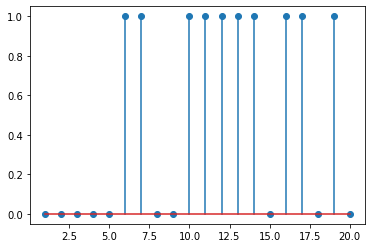

In [ ]:
plt.stem(list(range(1, 21)), our_arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

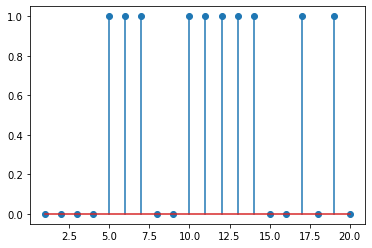

In [ ]:
plt.stem(list(range(1, 21)), lru_arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

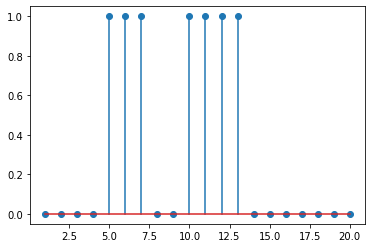

In [ ]:
plt.stem(list(range(1, 21)), fif_arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

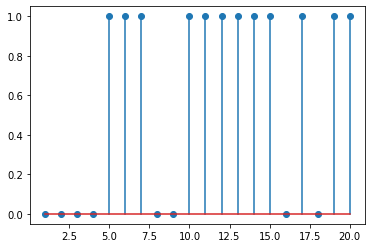

In [ ]:
plt.stem(list(range(1, 21)), opt_arr)